In [1]:
from nilearn.plotting import plot_stat_map
import numpy as np
from nilearn.image import load_img, get_data, new_img_like

/Users/zeynepenkavi/.pyenv/versions/3.8.3/envs/py-dvl-fmri/lib/python3.8/site-packages/nilearn/datasets/__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [13]:

def filt_nilearn_tval_tfce_img(reg='valSumTvpFrac_par', mnum='model13a', threshold=-np.log10(0.05)): 

    input_path = data_path+'%s_reg-rt0/overall-mean/%s_%s_reg-rt0/'%(mnum, reg, mnum)

    tval_img = input_path+'%s_%s_reg-rt0_pos_nilearn_t.nii.gz'%(reg, mnum)
    tval_img = load_img(tval_img)
    tval_data = get_data(tval_img)

    pos_pval_img = input_path+'%s_%s_reg-rt0_pos_nilearn_logp_max_tfce.nii.gz'%(reg, mnum)
    neg_pval_img = input_path+'%s_%s_reg-rt0_neg_nilearn_logp_max_tfce.nii.gz'%(reg, mnum)

    pos_pval_img = load_img(pos_pval_img)
    neg_pval_img = load_img(neg_pval_img)

    pos_pval_data = get_data(pos_pval_img)
    neg_pval_data = get_data(neg_pval_img)

    filt_tval_data = np.where(pos_pval_data > threshold, tval_data, np.where(neg_pval_data > threshold, tval_data, 0))
    filt_tval_img = new_img_like(tval_img, filt_tval_data)
    
    return filt_tval_img

    


In [4]:
data_path = '/Users/zeynepenkavi/Downloads/GTavares_2017_arbitration/bids_nifti_wface/derivatives/nilearn/glm/level2/'

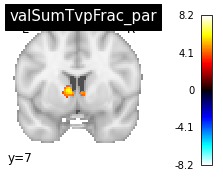

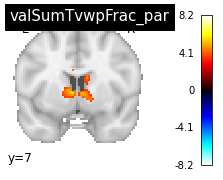

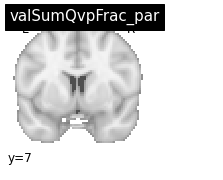

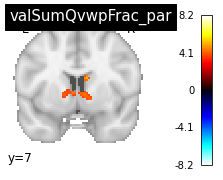

In [19]:
mods_dict = {'model13a': 'valSumTvpFrac_par', 'model13b': 'valSumTvwpFrac_par', 'model13c': 'valSumQvpFrac_par', 'model13d': 'valSumQvwpFrac_par'}

for k,v in mods_dict.items():
    filt_tval_img = filt_nilearn_tval_tfce_img(reg=v, mnum=k, threshold=-np.log10(0.07))
    plot_stat_map(filt_tval_img, draw_cross=False, cut_coords = [7], vmax=8.2, display_mode='y', title = v)